<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%204/Modulo_4_Ejercicio_3_Metricas_Regresion_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 3: Comparación de Métricas en Modelos de Regresión**
#### Evaluación de diferentes métricas en un modelo de regresión para predecir la vida útil de motores industriales

### **Introducción**
En este ejercicio, compararemos diferentes métricas de evaluación en un **problema de regresión**, donde el objetivo es predecir la **vida útil restante** de motores industriales.

El dataset utilizado contiene información sobre condiciones operativas de los motores y la cantidad de horas restantes antes de que fallen. Evaluaremos cómo métricas como **MSE, RMSE, MAE y R²** afectan la interpretación del modelo y discutiremos en qué situaciones es preferible usar cada una.

In [ ]:
# Celda 1: Carga de librerías y configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de gráficos
sns.set(style='whitegrid')

### **Descripción del dataset**
Se utilizará el dataset `control_calidad_motores_industriales.csv`, que contiene información sobre motores industriales y su vida útil restante. El objetivo es construir un modelo de regresión que prediga `Vida_util_restante`.

In [ ]:
# Celda 2: Carga del dataset
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_motores_industriales.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_motor,Horas_operacion,Temperatura_nucleo,Vibración,Consumo_energia,Tipo_aceite,Presion_sistema,Corriente_motor,Velocidad_rotacion,Desgaste_rodamientos,Fecha_instalación,Vida_util_restante
0,1,7770,81.610466,46.604460,318.231332,Aceite_A,2.295591,11.211465,2438,0.785107,2022-12-17,11445.208345
1,2,1360,68.652613,56.835307,347.379296,Aceite_C,2.236013,8.837599,1948,0.424782,2020-01-05,14162.529287
2,3,5890,62.997601,57.301942,276.613228,Aceite_C,1.896182,10.717229,2141,0.546722,2022-11-01,11713.160348
3,4,5691,61.966363,60.366103,259.887709,Aceite_C,1.642541,11.554843,1413,0.481573,2015-07-13,12164.564367
4,5,11784,84.117229,44.860333,334.598166,Aceite_B,2.078624,8.298306,2064,0.610559,2015-11-16,9181.087673


In [ ]:
# Celda 3: Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_motor              30000 non-null  int64  
 1   Horas_operacion       30000 non-null  int64  
 2   Temperatura_nucleo    30000 non-null  float64
 3   Vibración             30000 non-null  float64
 4   Consumo_energia       30000 non-null  float64
 5   Tipo_aceite           30000 non-null  object 
 6   Presion_sistema       30000 non-null  float64
 7   Corriente_motor       30000 non-null  float64
 8   Velocidad_rotacion    30000 non-null  int64  
 9   Desgaste_rodamientos  30000 non-null  float64
 10  Fecha_instalación     30000 non-null  object 
 11  Vida_util_restante    30000 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 2.7+ MB


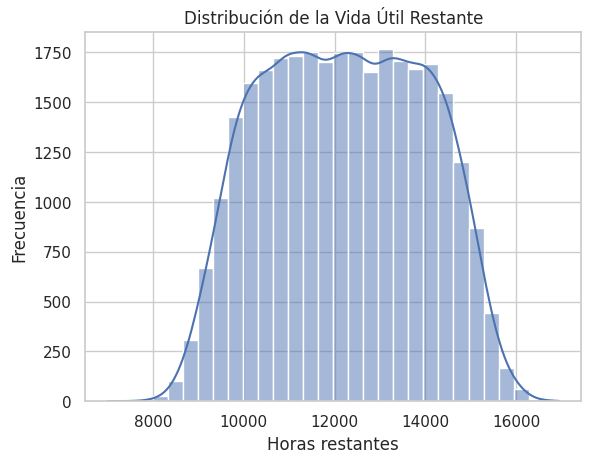

In [ ]:
# Celda 4: Distribución de la variable objetivo
sns.histplot(data['Vida_util_restante'], bins=30, kde=True)
plt.title('Distribución de la Vida Útil Restante')
plt.xlabel('Horas restantes')
plt.ylabel('Frecuencia')
plt.show()

### **Preprocesamiento de los datos**
Se seleccionan las variables numéricas y se normalizan antes de entrenar el modelo. Además, convertimos la variable objetivo en formato adecuado para modelos de regresión.

In [ ]:
# Celda 5: Manejo de valores faltantes
from sklearn.impute import SimpleImputer

# Seleccionar solo las variables numéricas
numeric_features = ['Horas_operacion', 'Temperatura_nucleo', 'Vibración', 'Consumo_energia', 'Presion_sistema', 'Corriente_motor', 'Velocidad_rotacion', 'Desgaste_rodamientos']

X = data[numeric_features]
y = data['Vida_util_restante']

# Imputar valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

### **Entrenamiento del modelo**
Se entrenará un modelo de **Regresión Lineal** para predecir la vida útil restante de los motores.

In [ ]:
# Celda 6: Entrenamiento del modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

### **Evaluación del modelo**
Se calcularán diferentes métricas para evaluar la precisión del modelo:

- **Error Absoluto Medio (MAE)**: Mide el promedio de los errores absolutos.
- **Error Cuadrático Medio (MSE)**: Penaliza errores grandes debido a la elevación al cuadrado.
- **Raíz del Error Cuadrático Medio (RMSE)**: Similar al MSE, pero en la misma escala que la variable objetivo.
- **Coeficiente de Determinación (R²)**: Indica qué proporción de la variabilidad de `y` es explicada por el modelo.

In [ ]:
# Celda 7: Cálculo de métricas de regresión
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.2f}')

Error Absoluto Medio (MAE): 396.63
Error Cuadrático Medio (MSE): 246613.37
Raíz del Error Cuadrático Medio (RMSE): 496.60
Coeficiente de Determinación (R²): 0.92


### **Visualización de resultados**
Se compararán los valores reales y las predicciones mediante un gráfico de dispersión.

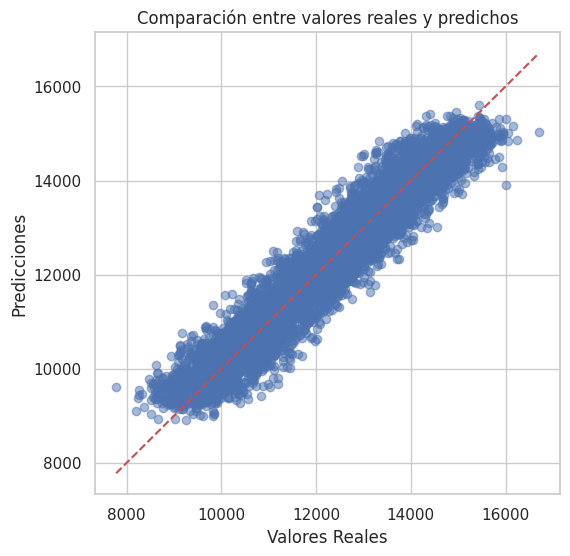

In [ ]:
# Celda 8: Comparación de valores reales vs predicciones
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predichos')
plt.show()

### **Conclusiones**
**Hallazgos clave:**
- **MAE** mide el error absoluto promedio, útil para interpretar en la escala original.
- **MSE** penaliza más los errores grandes debido a la elevación al cuadrado.
- **RMSE** es más intuitivo ya que está en la misma escala que la variable objetivo.
- **R²** indica qué tan bien el modelo explica la variabilidad de `y` (un 92%)

**Posibles mejoras:**
- Aplicar modelos más complejos como **Regresión Ridge o Random Forest**.
- Manejar mejor los valores atípicos para mejorar el rendimiento del modelo.
- Evaluar el uso de transformación de datos para mejorar la linealidad del modelo.